In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv("../tabela_final_treinamento.csv")

X = data.iloc[:, 0:225]
Y = data.iloc[:, -1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=42)

In [4]:
scaler_train = StandardScaler()

In [5]:
scaler_train.fit(X_train)
normalized_train = scaler_train.transform(X_train)
normalized_train

array([[-0.05492008, -0.19108476, -0.36056737, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       [-0.05492008,  0.01865806, -0.0199829 , ...,  0.67472059,
        -0.31903784, -0.1211944 ],
       [-0.05492008, -0.25101129, -0.46536259, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       ...,
       [-0.05492008,  0.07858459, -0.30816976, ..., -0.41935759,
        -0.31903784,  0.00455051],
       [-0.05492008, -0.19108476, -0.30816976, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       [-0.05492008,  0.07858459, -0.20337454, ..., -0.41935759,
        -0.31903784, -0.05832194]])

In [6]:
scaler_test = StandardScaler()

In [7]:
scaler_test.fit(X_test)
normalized_test = scaler_test.transform(X_test)
normalized_test

array([[-0.05381314, -0.41482246, -0.72504254, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314,  0.03317813,  0.3631335 , ...,  0.245966  ,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.24682224, -0.28977212, ...,  0.245966  ,
        -0.3808215 , -0.36780542],
       ...,
       [-0.05381314, -0.35882238, -0.47631659, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.35882238, -0.47631659, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.41482246, -0.56958882, ..., -0.50609757,
        -0.3808215 , -0.36780542]])

In [18]:
scaler_train_MM = MinMaxScaler()

normalized_train_MM = scaler_train_MM.fit_transform(X_train)
normalized_train_MM

array([[0.        , 0.00187617, 0.00930626, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00844278, 0.02030457, ..., 0.05      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00592217, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01031895, 0.01099831, ..., 0.        , 0.        ,
        0.00197044],
       [0.        , 0.00187617, 0.01099831, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01031895, 0.0143824 , ..., 0.        , 0.        ,
        0.00098522]])

In [19]:
scaler_test_MM = MinMaxScaler()

normalized_test_MM = scaler_test_MM.fit_transform(X_test)
normalized_test_MM

array([[0.        , 0.        , 0.00145773, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01869159, 0.05247813, ..., 0.05882353, 0.        ,
        0.        ],
       [0.        , 0.00700935, 0.02186589, ..., 0.05882353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00233645, 0.01311953, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00233645, 0.01311953, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00874636, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
param_grid = {"hidden_layer_sizes": [10, 20, 10], 
              "activation": ["relu", "tanh"],
              "solver": ["adam", "sgd"],
              "learning_rate_init": [0.001, 0.01, 0.1],
              "tol": [0.1, 0.001, 0.0001],
              "alpha": [0.0001, 0.01, 0.1],
              "batch_size": [32, 60, 100]
             }

# "max_iter": [100, 200, 500],

In [9]:
classifier = MLPClassifier()

In [ ]:
search = HalvingGridSearchCV(classifier, param_grid, scoring="f1_weighted").fit(X_train, y_train) 

In [10]:
search_normalized = HalvingGridSearchCV(classifier, param_grid, scoring="f1_weighted").fit(normalized_train, y_train) 

/home/renangas/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/renangas/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/renangas/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/renangas/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/renangas/anaconda3/lib/pyt

In [ ]:
search.best_params_

In [6]:
search.score(X_test, y_test)

0.4952981362068486

In [11]:
search_normalized.score(normalized_test, y_test)

0.5039571614247317

In [38]:
y_score = search_normalized.predict_proba(normalized_test)

In [39]:
top_k_accuracy_score(y_test, y_score, k=3, labels=[1, 2, 3, 4, 5])

0.9503424657534246

In [12]:
y_pred = search_normalized.predict(normalized_test)

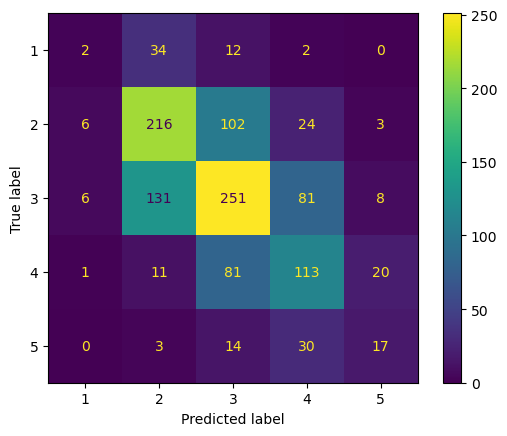

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=search_normalized.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_normalized.classes_)
disp.plot()
plt.savefig('MC_NN.png')
plt.show()

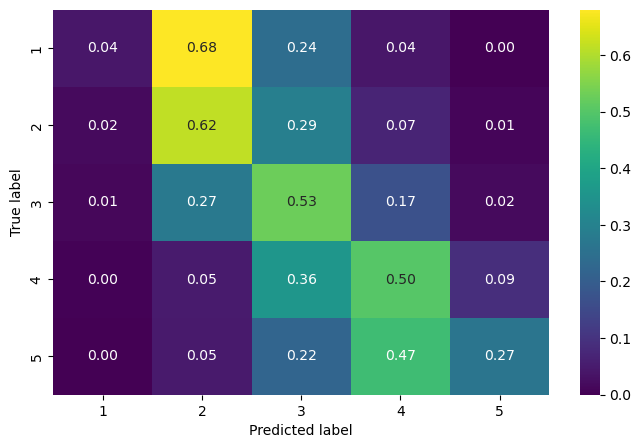

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=search_normalized.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5], cmap="viridis")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.savefig('MC_NN_Normalized.png')
plt.show(block=False)